<a href="https://colab.research.google.com/github/quangnhat1395/tensor_flow_uel/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Giới thiệu chung
Trong học máy, mạng neuron ngày càng được quan tâm và đã đạt được những thành tựu nhất định. Tiêu biểu như trong các lĩnh vực: Nhận diện hình ảnh (Krizhevsky, Sutskever,& Hinton, 2012), giọng nói (Collobert & Weston, 2008), và tin sinh học (Min, Lee, & Yoon, 2017). Các mô hình được xây dựng dựa trên các vấn đề thực tiễn như phân tích hành vi, an toàn thông tin,... với lượng thông tin cần được xử lý rất lớn.

Trong bối cảnh đó, nhiều công cụ mạnh mẽ, hiệu quả, linh hoạt đã được phát triển nhằm xử lý mạng neuron nói riêng, học máy nói chung, qua đó đẩy nhanh tiến độ nghiên cứu và ứng dụng các mô hình mạng neuron. Trong số các công cụ đó, TensorFlow nổi bật với khả năng tính toán mạnh mẽ, dễ sử dụng và có mức độ phổ biến cao cả trong nghiên cứu lẫn ứng dụng thực tế. Bài viết này nhằm mang lại cái nhìn tổng quan về mạng neuron trong học máy, cũng như việc sử dụng TensorFlow để giải quyết các bài toán liên quan. 
#2. Tổng quan về TensorFlow

TensorFlow là một nền tảng mã nguồn mở của Google phục vụ cho việc học tập, nghiên cứu và thực thi các dự án Machine learning. Nó có một hệ sinh thái toàn diện, linh hoạt bao gồm các công cụ, gói lệnh (package) cũng như có một cộng đồng hỗ trợ rộng lớn. Cho đến nay, có 2 phiên bản TensorFlow đã được ra đời, phiên bản 1x, và hiện tại là 2x. Có rất nhiều sự khác biệt giữa chúng, nên ở đây ta chỉ quan tâm đến TensorFlow 2x. 

Kể từ khi ra đời, TensorFlow ngày càng trở nên phổ biến trong cộng đồng Machine learning nói chung. Điều này thể hiện rõ ở số bài báo sử dụng TensorFlow ngày càng gia tăng.

![Các thư viện deep learning tương ứng với các hãng công nghệ lớn](https://uphinh.vn/images/2020/07/20/eb4e44684f39472be0c23d6cf202a5af.md.png)






Để cài đặt thư viện TensorFlow, trước tiên, ta cần cập nhật phiên bản **pip** của mình lên phiên bản mới nhất. Đây là một trình quản lý thư viện cho Python.

In [ ]:
pip install --upgrade pip


Tiếp theo, chúng ta sẽ cài đặt thư viện TensorFlow thông qua trình quản lý **pip** bằng câu lệnh dưới đây. Lưu ý, trong môi trường Colab của Google đã được tích hợp sẵn thư viện TensorFlow, nên ta không cần cài đặt thêm.

In [1]:
pip install tensorflow

Nếu đã cài đặt TensorFlow, ta có thể cập nhật nó lên phiên bản mới nhất, thông qua dòng lệnh dưới đây.

In [ ]:
pip install --upgrade tensorflow

Thử nhập thư viện TensorFlow và in ra phiên bản hiện dùng:

In [ ]:
import tensorflow as tf
print("TF Version:",tf.__version__)

TF Version: 2.2.0


Như vậy, ta đã tiến hành cài đặt và nhập thư viện TensorFlow vào  chương trình của mình. Thư viện TensorFlow có thể được cài đặt trên các hệ điều hành Windows, Ubuntu, macOs và Raspberry Pi. Ngoài ra, ta còn có thể sử dụng thư viện này dưới dạng docker. Tiếp theo, ta sẽ tìm hiểu về cách sử dụng TensorFlow trong việc xây dựng một đồ thị, đây là bước đầu của việc xây dựng một mạng Neuron trong học máy bằng TensorFlow.

#3. Sử dụng TensorFlow
Để hiểu hơn về TensorFlow, cũng như cách thức tính toán giá trị các điểm nút trong mạng neuron, chúng ta thử tìm hiểu các khái niệm, quy tắc cơ bản của TensorFlow.

##Khái niệm Tensor
Tensor là một mảng có n chiều (n-dimensional array). Chẳng hạn như:


*   0-d tensor, còn được gọi là scalar hay chỉ là một số. Ví dụ: 1, 2, -5
*   1-d tensor, còn được gọi là vector. Ví dụ: [1 2 3 4], [5 8 7 9]
*   2-d tensor, còn được gọi là ma trận(matrix). Ví dụ: [1 2 3; 4 5 6; 7 8 9]
*   ...

*Minh hoạ tensor*

![173ff3067c085606e4ecb194340aa26d.png](https://uphinh.vn/images/2020/07/17/173ff3067c085606e4ecb194340aa26d.png)
![6872d9e4f5f26a85889b2f96c5952b31.png](https://uphinh.vn/images/2020/07/17/6872d9e4f5f26a85889b2f96c5952b31.png)





## Xây dựng đồ thị (Graph) với **tf.function**
Đối với TensorFlow 2x, người ta đã loại bỏ khái niệm **session** để thực thi quá trình tính toán, thay vào đó, người ta dùng các **function** nhằm xây dựng graph một cách dễ dàng hơn. TensorFlow 2.0 cũng có nhiều thay đổi giúp người dùng TensorFlow làm việc hiệu quả hơn. Nó đã loại bỏ các API như tf.app, tf.flags, tf.logging và chuyển các hàm ít được sử dụng tf.* vào các gói con như tf.math. Một vài APIs được thay thế với bản 2.0 - tf.summary, tf.keras.metrics, và tf.keras.optimizers.

Một đồ thị thì sẽ bao gồm:
*   Đỉnh (node): Thông tin của các toán tử, hằng số, biến.
*   Các cạnh (edge): Chứa Tensor.

Như vậy, dữ liệu của chúng ta sẽ đi vào các đỉnh, theo các tensor ở cạnh, trả về kết quả ở các đỉnh kế tiếp. 
![f8573af8519fe2b37edcddc4fb7922de.md.png](https://uphinh.vn/images/2020/07/17/f8573af8519fe2b37edcddc4fb7922de.md.png)






Trong TensorFlow 2x người ta sử dụng tf.function để xây dựng các đồ thị. Một lợi ích khác của tf.function so với sesson của TensorFlow 1x là nó linh hoạt hơn, dễ dàng thực thi hơn như bất cứ hàm nào khác của Python. Ta xét một ví dụ đơn giản sau:

In [ ]:
import tensorflow as tf

@tf.function
def square_if_positive(x):
    if x > 0:
        x = x * x
    else:
        x = 0
    return x

print('square_if_positive(2) = {}'.format(square_if_positive(tf.constant(2))))
print('square_if_positive(-2) = {}'.format(square_if_positive(tf.constant(-2))))

square_if_positive(2) = 4
square_if_positive(-2) = 0


Ở đây, ta hoàn toàn có thể sử dụng các câu lệnh điều khiển cấu trúc của Python, qua đó giúp cho việc xây dựng graph được dễ dàng hơn.

Tiếp theo, ta thử xây dựng một layer đơn giản với tf.function như sau:

In [ ]:
import tensorflow as tf 

def linear_layer(x):
    return 2 * x + 1

@tf.function
def deep_net(x):
    return tf.nn.relu(linear_layer(x))

deep_net(tf.constant((1, 2, 3)))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 7], dtype=int32)>

Ta thấy, với đầu vào là tensor (1, 2, 3), thông qua lớp layer tuyến tính 2x + 1, ta thu được một tensor, có kết quả là (3, 5, 7).


Tiếp theo, ta sẽ giới thiệu sơ lược mạng neuron trong học máy, và tiến hành thử xây dựng mạng neuron bằng TensorFlow để giải bài toán phân loại chữ số viết tay với data MNIST.

#4. Mạng neuron trong học máy
Trước tiên, ta xem xét một ví dụ cơ bản là mô hình **Hồi quy tuyến tính**. Đặt $X_i\in \mathbb{R}^p$ là các predictors hay feature, $y_i, \ i = \overline{1, n}$ là các giá trị đầu ra, hay các biến mục tiêu của mẫu thứ $i$. Chẳng hạn, ứng với bài toán nhận diện chữ số viết tay, $X_i$ sẽ là ma trận đầu vào của hình ảnh chữ số cần được nhận diện, $y_i$ là giá trị chính xác mà ta cần máy nhận diện ($y_i$ nhận giá trị trong tập $\{0, 1, 2, ..., 9\})$. Ta cần xem xét mô hình hồi quy tuyến tính dưới đây:

$$y_i = X_i^T\beta + \epsilon_i $$

trong đó, $\beta \in \mathbb{R}^p$ là tập hợp tất cả các tham số, $\epsilon_i \sim N(0, \sigma^2)$ là phần tử nhiễu tuân theo phân phối chuẩn. 

Nếu $y_i = \{0, 1\}$ biểu diễn biến phân loại của mẫu thứ $i$, ta thường mô hình bài toán ban đầu theo **hồi quy logistic**. Khi đó, giả sử $y_i|X_i\sim Bernoulli(p_i)$ và 

$$p_b(y_i = 1|X_i) = \textrm{sigmod}(X_i^T\beta) = \dfrac{1}{1 + \exp(-X_i^Tb)},$$
$$p_b(y_i|X_i) = p_i^{y_i}(1 - p_i)^{1 - y_i}$$
trong đó $p_i = p_\beta(y_i|X_i)$.

Để đánh giá mô hình phục vụ cho việc "học" của các tham số (theo nghĩa máy học) chúng ta cần xác định *loss function* (hàm mất mát) ứng với mỗi mô hình. Loss function trả về một số thực không âm thể hiện sự chênh lệch giữa hai đại lượng: $\hat{y}$, label được dự đoán và $y$, label đúng. Trong mọi bài toán supervised learning, mục tiêu của ta luôn bao gồm giảm thiểu tổng giá trị của loss function. Trong trường hợp lý tưởng $\hat{y} = y$, loss function sẽ trả về giá trị cực tiểu bằng 0 (hiếm khi xảy ra trường hợp này).

Ứng với mô hình hồi quy tuyến tính, ta thường định nghĩa loss function như sau:
$$L(y_i, X_i; \beta) = (y_i - X_i^T\beta)^2$$

Chú ý rằng, $X_i^T\beta$ chính là giá trị dự đoán của ta, do đó, loss function trên được định nghĩa theo cách bình phương độ chênh lệch giữa giá trị dự đoán và giá trị chính xác, $y_i$.

Đối với mô hình hồi quy logistic, ta thường định nghĩa hàm loss function như sau:

$$L(y_i, X_i; \beta) = - \log p_\beta(y_i|X_i) = - [y_i\log p_i+(1- p_i)\log (1 - p_i)]$$



Trong thư viện TensorFlow, ta có thể định nghĩa rất nhiều loss function, tuỳ thuộc vào bài toán đang giải. Bạn đọc có thể tham khảo thêm tại trang web này: [https://www.tensorflow.org/api_docs/python/tf/keras/losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

Chẳng hạn, để sử dụng loss function được định nghĩa bởi công thức $L = |y - \hat{y}|$, ta có thể sử dụng hàm **tf.keras.losses.MeanAbsoluteError()** như dưới đây:





In [ ]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
# Using 'auto'/'sum_over_batch_size' reduction type.
mae = tf.keras.losses.MeanAbsoluteError()
mae(y_true, y_pred).numpy()

0.5

Để giảm tối thiểu loss function của mô hình đã xây dựng, ta thường tìm các tham số $\beta$ sao cho trung bình của tất cả các mẫu, tức là tìm $\beta$ để $\frac{1}{n}\sum_{i = 1}^n L(y_i, X_i; \beta)$ đạt cực tiểu. Bài toán tối ưu này thường có nghiệm lý thuyết (nghiệm chính xác) ứng với các mô hình hồi quy tuyến tính, tuy nhiên đối với hầu hết các trường hợp còn lại như hồi quy logistic, chúng ta cần các phương pháp số để tìm nghiệm xấp xỉ, và điều này thực hiện cũng rất khó khăn. Do đó, các mạng neuron được ra đời để giải quyết các vấn đề này.

Nói đơn giản, hầu hết các mạng neuron được xây dựng để giải quyết các bài toán hồi quy hoặc phân loại (như trường hợp hồi quy logistic ở trên), tuy nhiên chúng không đơn thuần sử dụng các hàm tuyến tính $X_i^T\beta$ để mô hình hoá ánh xạ đi từ $X_i$ tới $y_i$, mạng neuron sử dụng một lớp các hàm phức tạp và tinh vi hơn, thuận tiện cho quá trình biểu diễn ánh xạ đi từ $X_i$ tới $y_i$.

Mạng neuron đa lớp (Multilayer neural networks) thường được xem là linh hoạt và sử dụng các hàm xấp xỉ có tính phổ quát hơn (Cybenko, 1989; Hornik, 1991). Do sự phức tạp của mạng neuron, các tham số tối ưu của mô hình cần được tính toán thông qua các phương pháp lặp, tiêu biểu là *mini-batch gradient descent*. Ta có thể minh hoạ một mạng neuron đa lớp như hình dưới đây:

[![Mạng neuron đa lớp](https://uphinh.vn/images/2020/07/17/9c9bf04190b7025d48d907336433e464.md.png)](https://uphinh.vn/image/L3YWv)



#5. Convolutional Neural Network
Convolutional Neural Network (CNN) là một cấu trúc phổ biến và rất quen thuộc trong mạng neuron. Nó được ứng dụng nhiều trong Computer Vision, Recommender System, Natural Language Processing,... Ví dụ, khi upload một tấm hình lên Google Hình ảnh, hệ thống của sẽ trả về những thông tin liên quan đến hình ảnh đó.

![dcd9e22bd20bd495f17a26bf42e8e2d4.md.png](https://uphinh.vn/images/2020/07/20/dcd9e22bd20bd495f17a26bf42e8e2d4.md.png)

CNN là một cấu trúc rộng lớn, trong bài viết này, chúng tôi không đi sâu vào các cấu trúc của nó, mà chỉ mang lại cái nhìn tổng quát, từ đó áp dụng vào mạng neuron trong học máy.

## 5.1 Toán tử Convolution (tích chập)

Tích chập của hàm số $x$ và $w$ được viết là $x*w$, là 1 phép biến đổi tích phân đặc biệt: 

$$(x*w)(t) = \int_{\mathbb{R}^d}x(a)g(t-a)\mathrm{d}a$$
Trong CNN, ta ký hiệu phần tử thứ nhất của tích chập (tức $x$) là **input**, phần tử thứ hai của tích chập (tức $w$) chính là **kernel**, còn output ($x*w$) chính là **feature map**.

Đối với trường hợp rời rạc, tích chập chính là phép nhân ma trận. Ta có thể minh họa ở hình dưới đây:
![1c2adb4e587c209289f15b337ed68dc3.png](https://uphinh.vn/images/2020/07/20/1c2adb4e587c209289f15b337ed68dc3.png)

Chính vì kích cỡ của kernel nhỏ hơn rất nhiều so với input, nên cho ra output có kích cỡ nhỏ hơn input. Thay vì xử lí trên input, ta chỉ cần xử lý trên **feature map**.

Chẳng hạn, với input (kích thước 5x5) và kernel (kích thước 3x3) như hình dưới đây:

![584c1dc1354fba35e97c6e433f703ad0.md.png](https://uphinh.vn/images/2020/07/20/584c1dc1354fba35e97c6e433f703ad0.md.png)

Ta thu được **feature map** (kích thước 3x3) như sau:

![aca7db74f03c91a4bcaf5a4cfdae6378.md.gif](https://miro.medium.com/max/1167/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)

##5.2 Stride and Padding

Stride là khoảng cách giữa 2 kernel khi quét. Với stride = 1, kernel sẽ quét 2 ô ngay cạnh nhau, nhưng với stride = 2, kernel sẽ quét ô số 1 và ô số 3. Bỏ qua ô ở giữa. Điều này nhằm tránh việc lặp lại giá trị ở các ô bị quét.

![alt text](https://viblo.asia/uploads/full/dc386839-cbeb-42cf-8d78-4fe6576cffb3.gif)

Ứng với stride = 2, ta có:

![alt text](https://viblo.asia/uploads/full/c92f73c5-a0d5-490a-99be-450d931ace78.gif)

Trong trường hợp muốn giữ nguyên kích cỡ của feature map so với ban đầu, chúng ta sẽ sử dụng **Padding**. Khi ta điều chỉnh padding = 1, tức là ta đã thêm 1 ô xung quanh các cạnh của input, cụ thể như hình dưới đây:

![alt text](https://viblo.asia/uploads/full/60eea7f2-735d-45dd-9c62-143411c33b93.gif)


##5.3 Pooling

Mục đích của **Pooling** trong CNN chính là làm giảm số tham số cần tính toán của mạng neuron, tránh trường hợp overfitting. Loại pooling ta thường gặp nhất là max pooling, lấy giá trị lớn nhất trong một pooling window. Nguyên tắc hoạt động của nó cũng giống với tích chập, nhưng thay vì nhân từng phần tử với kernel, nó chỉ chọn ra một giá trị duy nhất. 

![alt text](https://viblo.asia/uploads/c611fdb5-87dc-4cb5-85fa-ba312b9a9462.png)

##5.4 Cấu trúc của CNN

CNN có cấu trúc được tạo thành từ nhiều lớp layer, thông thường chúng sẽ bao gồm các convolution layer, kết hợp với Max Pooling, cùng với việc trải phẳng ma trận ban đầu thành một Fully Connected layer (vector 1D) để tìm ra output. Một cấu trúc CNN thường gặp trong xử lý ảnh được cho ở hình dưới.

![alt text](https://viblo.asia/uploads/f087aedf-817a-441f-801f-ddda5d695e31.png)

Trong phần tiếp theo, ta sẽ xây dựng một mạng neuron đơn giản, kết hợp với CNN để giải bài toán nhận diện chữ số viết tay với bộ dữ liệu MNIST.






#6. Ví dụ về mạng Neuron đơn giản thông qua bộ dữ liệu MNIST
#6.1 Bài toán

Người dùng nhập vào một bức ảnh chữ số viết tay bất kỳ, máy tính sẽ trả về kết quả số được viết trong ảnh $n \in \{0, 1, 2,... , 9\} $. Đây là một trong những bài toán phân loại hình ảnh kinh điển. 

Việc huấn luyện một mô hình deep learning hay neural network nói chung bao gồm các bước:

1.   Chuẩn bị dữ liệu
2.   Xây dựng network
3.   Chọn thuật toán cập nhật nghiệm, xây dựng loss và phương pháp đánh giá mô hình
4.   Huấn luyện mô hình
5.   Đánh giá mô hình

#6.2 Chuẩn bị dữ liệu

Đầu tiên, ta tiến hành nhập data MNIST thông qua lệnh *datasets*, thuộc gói *keras* của TensorFlow như sau:

In [ ]:
import tensorflow as tf

print('TF version:',tf.__version__)

mnist = tf.keras.datasets.mnist


TF version: 2.2.0


Mnist là bộ dữ bao gồm 60000 bức ảnh về chữ số viết tay và đều được gán nhãn (label). Mỗi ảnh có kích thước 28 x 28 pixel.

Một ảnh trong bộ dữ liệu MNIST có dạng như sau:

![eeca1e911dd8fdc0359d2e2953517ac8.png](https://uphinh.vn/images/2020/07/18/eeca1e911dd8fdc0359d2e2953517ac8.png)

Tiếp theo, ta cần chia bộ dữ liệu làm 2 phần: training set gồm 60.000 ảnh và test set gồm 10.000 ảnh các chữ số viết tay. Từ training set được chia ra 50000 ảnh cho training, 10000 ảnh cho validation, Test set vẫn giữ nguyên 10.000 ảnh ban đầu.

*   **Training set**: dữ liệu dùng để training model.
*   **Validation set**: dữ liệu dùng để đánh giá xem model đang dùng thế nào và được dùng điều chỉnh các tham số của model.
*   **Test set**: để đánh giá model đang dùng với dữ liệu thực tế.



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val,y_val = x_train[50000:60000,:], y_train[50000:60000]
x_train, y_train = x_train[:50000,:], y_train[:50000]
print(x_train.shape)


11493376/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


Ta nhận thấy, x_train có shape là (50000, 28, 28) tức là dữ liệu gồm 50000 ma trận có kích thước 28x28. Ta thử in ra giá trị đầu tiên của x_train như sau:

In [ ]:
print(x_train[0])

Thử in ra hình ảnh đầu tiên của data MNIST, ứng với x_train đầu tiên ở trên bằng thư viện matplotlib.

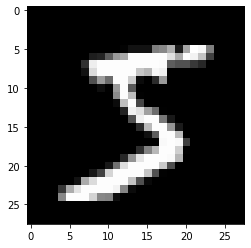

gia tri cua y_train dau tien là:  5


In [ ]:
import matplotlib.pyplot as plt # thư viện vẽ hình trong python

#Vẽ ra x_train đầu tiên
plt.imshow(x_train[0], cmap='gray')
plt.show()

print('gia tri cua y_train dau tien là: ', y_train[0]) #in ra giá trị label đầu tiên ứng với x ở trên

##6.3 Tinh chỉnh dữ liệu

Tiếp theo, trước khi tiến hành xây dựng mạng neuron, ta cần tinh chỉnh dữ liệu của mình để tối ưu hoá.

Đầu tiên, ta reshape lại data theo yêu cầu của keras: $(N, W, H, D)$ trong đó $N$ là số bức ảnh cho mỗi lần train, vì bài này là ảnh xám có kích thước 28 x 28 nên $W = H = 28, D = 1.$ 

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

x_val = x_val.reshape(x_val.shape[0],28,28,1)

x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(y_train)

(50000, 28, 28, 1)
[5 0 4 ... 8 4 8]


Bước tiếp theo, ta sẽ chuyển dữ liệu của y (bao gồm cả tập train, test, val) từ dạng scalar ($n\in \{0, 1, 2, ..., 9\}$ sang dạng vector có 10 phần tử. Chẳng hạn, nếu $y = 5$, ta sẽ chuyển thành vector $ [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$.


In [ ]:
# 4. One hot encoding label (Y)
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Using TensorFlow backend.


#6.4 Xây dựng mạng neuron
TensorFlow hỗ trợ xây dựng mạng neuron rất thuận tiện. Trước hết, ta sẽ sử dụng keras trong thư viện TensorFlow để xây dựng mô hình. Có hai cách để xây dựng một mô hình với Keras: Sequential API và Functional API. Ta có thể xem xét sự khác nhau giữa chúng thông qua ví dụ dưới đây:

In [ ]:
    #VD: Xây dựng model với Sequential API
    # Example of a simple architecture with 3 fully connected layers
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    model = Sequential()
    model.add(Dense(64, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(64, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(10, input_dim=784))
    model.add(Activation('softmax'))

    model.summary()

In [ ]:
    #VD xây dựng mô hình theo Functional API
    # This is an example of the same architecture as above
    from keras.layers import Input, Dense
    from keras.models import Model
    inputs = Input(shape=(784,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)

    model.summary()

$\textrm{Sequantial([<a list>])}$ là thể hiện việc các layer được xây dựng theo đúng thứ tự trong $\textrm{[<a list>]}$. Phần tử đầu tiên của list thể hiện kết nối giữa input layer và layer tiếp theo, các phần tử tiếp theo của list thể hiện kết nối của các layer tiếp theo.

Dense thể hiện một fully connected layer, tức toàn bộ các unit của layer trước đó được nối với toàn bộ các unit của layer hiện tại. Giá trị đầu tiên trong Dense bằng 64 thể hiện việc có 64 unit ở layer này, input_shape = 784 chính là kích thước của dữ liệu đầu vào (ma trận 28 x 28).

Các layer cũng có thể được thêm lần lượt vào model bằng cách sử dụng hàm **.add()**.

Trở lại bài toán phân loại với data MNIST ban đầu, ta xây dựng mô hình với mạng neuron như sau:

In [ ]:
# 5. Định nghĩa model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
#model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

# Tóm tắt model đã xây dựng và số tham số cần ước tính
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


Bạn đọc có thể tham khảo thêm thông tin về các lớp layer ở trang web: [https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)

##6.5 Chọn thuật toán cập nhật nghiệm, xây dựng loss function và phương pháp đánh giá mô hình

Ở bước này, TensorFlow cho phép ta đơn giản hoá bằng việc truyền các tham số vào hàm **model.compile()**.

Chẳng hạn, với bài toán phân loại chữ số viết tay ở trên, nếu chọn thuật toán để cập nhật nghiệm là **Adam**, loss function là **categorical_crossentropy**, phương pháp đánh giá mô hình là **accuracy**, ta làm như sau:

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 6.6 Huấn luyện mô hình

Sử dụng lệnh  **model.fit()** ta tiến hành huấn luyện mô hình như sau:

In [ ]:
H = model.fit(x_train, Y_train, validation_data=(x_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 35s 694us/step - loss: 0.5162 - accuracy: 0.8945 - val_loss: 0.1511 - val_accuracy: 0.9632
Epoch 2/10
50000/50000 [==============================] - 35s 698us/step - loss: 0.1340 - accuracy: 0.9649 - val_loss: 0.0884 - val_accuracy: 0.9761
Epoch 3/10
50000/50000 [==============================] - 34s 689us/step - loss: 0.0958 - accuracy: 0.9732 - val_loss: 0.0816 - val_accuracy: 0.9767
Epoch 4/10
50000/50000 [==============================] - 34s 687us/step - loss: 0.0754 - accuracy: 0.9786 - val_loss: 0.0833 - val_accuracy: 0.9769
Epoch 5/10
50000/50000 [==============================] - 34s 684us/step - loss: 0.0659 - accuracy: 0.9813 - val_loss: 0.0964 - val_accuracy: 0.9711
Epoch 6/10
50000/50000 [==============================] - 34s 680us/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 0.0719 - val_accuracy: 0.9787
Epoch 7/10
50000/50000 [==============================] 

## 6.7 Đánh giá mô hình 
Để đánh giá mô hình, ta sẽ sử dụng lệnh **model.evaluate()** như sau:


In [ ]:
model.evaluate(x_test, Y_test)

10000/10000 [==============================] - 2s 187us/step


[0.07086349124256522, 0.9789000153541565]

##6.8 Dự báo
Thử dự đoán một hình ảnh bất kì trong thư viện MNIST, sử dụng mô hình vừa xây dựng.

2


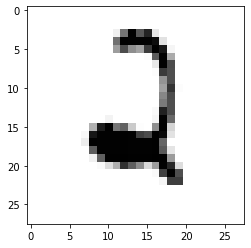

In [ ]:
image_index = 4445 #nhập số tuỳ ý 
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())